In [184]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os 
import copy
from datetime import datetime, timedelta

# Nueva sección

In [185]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,date,year_week,product_number,reporterhq_id,prod_category,specs,display_size,segment,sales_units,inventory_units
0,202119-6909,2021-05-15,202119,6909,93,Arale,21274,13.3,Premium,2.0,35.0
1,202120-6909,2021-05-22,202120,6909,93,Arale,21274,13.3,Premium,0.0,70.0
2,202121-6909,2021-05-29,202121,6909,93,Arale,21274,13.3,Premium,3.0,137.0
3,202122-6909,2021-06-05,202122,6909,93,Arale,21274,13.3,Premium,0.0,274.0
4,202123-6909,2021-06-12,202123,6909,93,Arale,21274,13.3,Premium,0.0,333.0


In [186]:
train_df.dtypes

id                  object
date                object
year_week            int64
product_number       int64
reporterhq_id        int64
prod_category       object
specs                int64
display_size       float64
segment             object
sales_units        float64
inventory_units    float64
dtype: object

In [187]:
train_df.isna().sum()

id                   0
date                 0
year_week            0
product_number       0
reporterhq_id        0
prod_category        0
specs                0
display_size         0
segment              0
sales_units        491
inventory_units    493
dtype: int64

In [188]:
subset = train_df[["id", "reporterhq_id"]]
dup = np.sum(subset.duplicated())
print(f"Existen {dup} columnas duplicadas")

Existen 0 columnas duplicadas


In [189]:
sales_unit_na= train_df["sales_units"].isna().sum()/train_df.shape[0]
inventory_unit_na= train_df["inventory_units"].isna().sum()/train_df.shape[0]

print(f"Un {sales_unit_na*100}% de sales_unit son nulos y {inventory_unit_na*100}% de inventory null")

Un 3.1771709589750223% de sales_unit son nulos y 3.190112592209137% de inventory null


In [190]:
non_na = train_df.dropna()
non_na.isna().sum()

id                 0
date               0
year_week          0
product_number     0
reporterhq_id      0
prod_category      0
specs              0
display_size       0
segment            0
sales_units        0
inventory_units    0
dtype: int64

In [191]:
print(non_na.shape, train_df.shape)

(14478, 11) (15454, 11)


In [192]:
non_na.describe()

,year_week,product_number,reporterhq_id,specs,display_size,sales_units,inventory_units
count,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000,14478.000000
mean,202240.919809,127111.665562,42.032739,112407.304669,15.159525,26.002625,71.749482
std,61.643873,77427.684132,34.864066,63754.223010,1.422528,29.398877,66.317573
min,201915.000000,6909.000000,3.000000,967.000000,11.000000,0.000000,0.000000
25%,202218.000000,58233.000000,15.000000,58987.000000,14.000000,3.000000,26.000000
50%,202239.000000,116466.000000,24.000000,109271.000000,15.600000,16.000000,56.000000
75%,202304.000000,196413.000000,78.000000,157621.000000,15.600000,38.000000,97.000000
max,202318.000000,247737.000000,96.000000,236915.000000,17.300000,186.000000,399.000000


In [193]:
non_na.shape

(14478, 11)

In [194]:
test = non_na
test = test.groupby("id")[["id", "inventory_units"]].sum()
new_df = non_na.drop_duplicates(subset=['id'],keep = 'first')
test.reset_index(inplace=True)

new_df = pd.merge(new_df, test, on = 'id', how = 'left')
new_df.loc[new_df['inventory_units_y'].notnull(), 'inventory_units'] = new_df['inventory_units_y']
new_df.drop(['inventory_units_y', 'inventory_units_x', 'reporterhq_id'], axis=1, inplace=True)
new_df.describe()

<ipython-input-194-9d60024c3852>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test = test.groupby("id")[["id", "inventory_units"]].sum()


,year_week,product_number,specs,display_size,sales_units,inventory_units
count,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000
mean,202228.855741,126547.873906,110023.623972,15.157704,27.761204,137.733890
std,64.456047,80560.155233,63865.270865,1.422126,29.988587,118.812817
min,201915.000000,6909.000000,967.000000,11.000000,0.000000,0.000000
25%,202210.000000,51324.000000,56086.000000,14.000000,4.000000,55.000000
50%,202232.000000,114492.000000,108304.000000,15.600000,19.000000,111.000000
75%,202252.000000,201348.000000,155687.000000,15.600000,41.000000,186.000000
max,202318.000000,247737.000000,236915.000000,17.300000,186.000000,889.000000


In [195]:
new_df["date"] = pd.to_datetime(new_df["date"])
new_df

,id,date,year_week,product_number,prod_category,specs,display_size,segment,sales_units,inventory_units
0,202119-6909,2021-05-15,202119,6909,Arale,21274,13.3,Premium,2.0,35.0
1,202120-6909,2021-05-22,202120,6909,Arale,21274,13.3,Premium,0.0,70.0
2,202121-6909,2021-05-29,202121,6909,Arale,21274,13.3,Premium,3.0,137.0
3,202122-6909,2021-06-05,202122,6909,Arale,21274,13.3,Premium,0.0,274.0
4,202123-6909,2021-06-12,202123,6909,Arale,21274,13.3,Premium,0.0,333.0
...,...,...,...,...,...,...,...,...,...,...
7537,202314-247737,2023-04-08,202314,247737,Arale,10637,13.3,Premium,13.0,44.0
7538,202315-247737,2023-04-15,202315,247737,Arale,10637,13.3,Premium,12.0,30.0
7539,202316-247737,2023-04-22,202316,247737,Arale,10637,13.3,Premium,6.0,37.0
7540,202317-247737,2023-04-29,202317,247737,Arale,10637,13.3,Premium,12.0,65.0


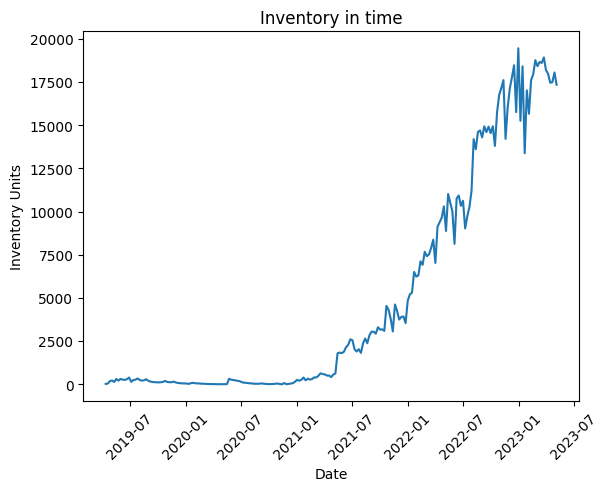

In [196]:
gd = new_df.groupby('date').sum(numeric_only = True)
plt.plot(gd.index, gd.inventory_units)
plt.xticks(rotation = 45)
plt.xlabel('Date') 
plt.ylabel('Inventory Units')
plt.title('Inventory in time')
plt.show()

In [197]:
new_df = new_df[new_df.year_week > 202101]

new_df.sort_values(by = 'id').reset_index(drop = True)

,id,date,year_week,product_number,prod_category,specs,display_size,segment,sales_units,inventory_units
0,202102-11844,2021-01-16,202102,11844,Doraemon,109271,15.6,Gaming,35.0,37.0
1,202102-12831,2021-01-16,202102,12831,Doraemon,180829,15.6,Gaming,62.0,93.0
2,202102-233919,2021-01-16,202102,233919,Clover,106370,15.6,Core,2.0,0.0
3,202102-235893,2021-01-16,202102,235893,Clover,50284,17.3,Core,9.0,40.0
4,202102-247737,2021-01-16,202102,247737,Arale,10637,13.3,Premium,6.0,14.0
...,...,...,...,...,...,...,...,...,...,...
7359,202318-92778,2023-05-06,202318,92778,Goku,140215,14.0,Core,21.0,92.0
7360,202318-93765,2023-05-06,202318,93765,Arale,155687,14.0,Premium,34.0,31.0
7361,202318-94752,2023-05-06,202318,94752,Clover,224344,14.0,Core,5.0,369.0
7362,202318-9870,2023-05-06,202318,9870,Doraemon,107337,15.6,Gaming,0.0,111.0


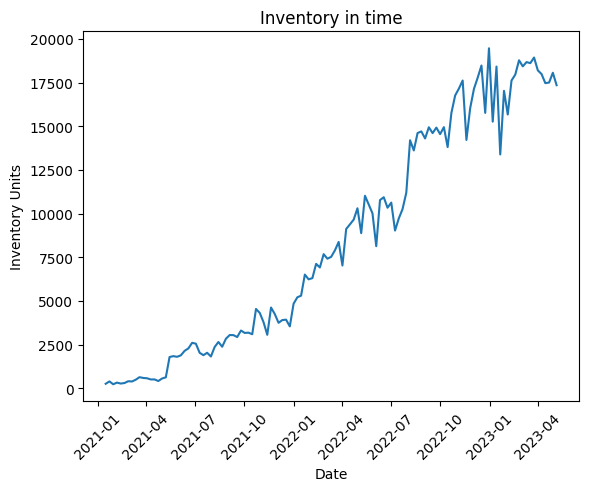

In [198]:
gd = new_df.groupby('date').sum(numeric_only = True)
plt.plot(gd.index, gd.inventory_units)
plt.xticks(rotation = 45)
plt.xlabel('Date') 
plt.ylabel('Inventory Units')
plt.title('Inventory in time')
plt.show()

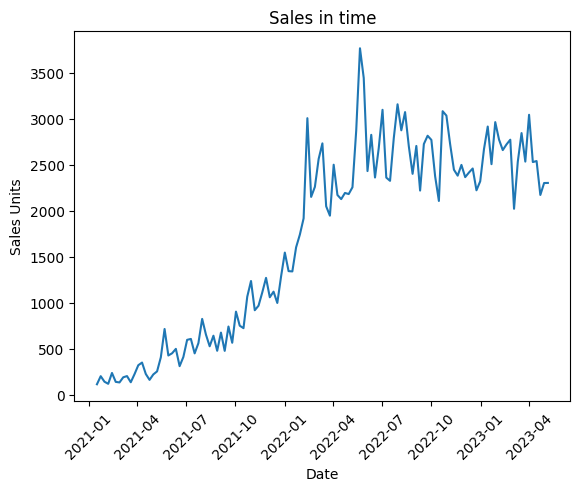

In [199]:
plt.plot(gd.index, gd.sales_units)
plt.xticks(rotation = 45)
plt.xlabel('Date') 
plt.ylabel('Sales Units')
plt.title('Sales in time')
plt.show()

In [200]:
for i,row in new_df[:-1].iterrows():
    date = row["date"]
    product_number = row["product_number"]
    row2 = new_df.iloc[i+1]
    if row2["product_number"] == product_number:
        diff = row2["date"] - date
        if diff.days > 7:
            p_num = row["product_number"]
            weeks_diff = int(diff.days / 7)
            if weeks_diff <= 3:
                incremento = (row2["sales_units"] -  row["sales_units"]) / (weeks_diff)
                current_date = date
                for k in range(1,weeks_diff):
                    new_row = copy.copy(row)
                    current_date += timedelta(days=7)
                    new_row["date"] = current_date
                    new_row["sales_units"] = row["sales_units"] + k * incremento
                    anho, semana, _ = current_date.isocalendar()
                    new_row["identifier"] = str(anho) + str('{:0>2d}'.format(semana)) + "-" + str(row["product_number"])
                    new_df.loc[i+k-1] = new_row

IndexError: ignored

In [ ]:
new_df[['sales_units', 'inventory_units', 'year_week']] = new_df[['sales_units', 'inventory_units', 'year_week']].astype(int)

In [ ]:
new_df.describe().transpose()

In [ ]:
error = []
for i, row in new_df[1:].iterrows():
  if row.sales_units + row.inventory_units < new_df.loc[i-1].inventory_units:
      error.append(new_df.loc[i-1].inventory_units - (row.sales_units + row.inventory_units))
      if new_df.loc[i-1].inventory_units - (row.sales_units + row.inventory_units) < 0:
          print(f"Fila {i} tiene un error con una medida de {new_df.loc[i-1].inventory_units - (row.sales_units + row.inventory_units)}")

print("Numero de errores es ", len(error))
print("Min de errores es ", np.array(error).min())
print("Min de errores es ", np.array(error).max())
print("Media de errores es ", np.array(error).mean())
print("Std de errores es ", np.array(error).std())


In [ ]:
new_df["purchases_units"] =  0

for i in range(1, len(new_df)):
    compras = new_df.at[i, 'inventory_units'] - (new_df.at[i, 'sales_units'] + new_df.at[i-1, 'inventory_units'])
    new_df.at[i, 'purchases_units'] = compras
    
new_df.head()

In [ ]:
new_df.describe().transpose()

## Visualización

In [ ]:
def datos_atipicos(df, variable, cambio='no'):
    sns.boxplot(x=df[variable])
    q9=np.quantile(df[variable], 0.90)
    q1=np.quantile(df[variable], 0.10)
    iqr=q9-q1
    upper=q9+(1.5*iqr)
    lower=q1-(1.5*iqr)
    outlier=np.append(np.where(df[variable]>upper),np.where(df[variable]<lower))
    if len(outlier)!=0:
        print('Los valores considerados atípicos de la variable se encuentran por encima de',upper, ' o por debajo de',lower)
        print('Hay', len(outlier),'valores poco frecuentes y se encuentran en las posiciones:{}'.format(outlier))
        if cambio=='si':
            df[variable].loc[np.where(df[variable]>upper)]=upper
            df[variable].loc[np.where(df[variable]<lower)]=lower
    else:
        print(' No tiene valores atípicos')

In [ ]:
datos_atipicos(new_df, 'sales_units')

In [ ]:
datos_atipicos(new_df, 'inventory_units')

In [ ]:
datos_atipicos(new_df, 'purchases_units')

## Normalización

In [ ]:
train = new_df

train = train.drop(["date", "id"], axis =1)

Y_train = train.inventory_units
X_train = train.drop("inventory_units", axis = 1)

X_train = pd.get_dummies(X_train, columns=['product_number', 'segment', 'prod_category'])

X_train.dtypes

In [ ]:
from sklearn.preprocessing import StandardScaler

num_columns = ["year_week", "display_size", "sales_units", "specs", "purchases_units"]

scaler = StandardScaler()
sub_X_train = X_train[num_columns]
sub_X_train = pd.DataFrame(scaler.fit_transform(sub_X_train), columns=num_columns)

X_train[num_columns] = sub_X_train[num_columns]
X_train

In [ ]:
def sliding_window(data, labels, input_width, label_width=1, offset=1):
    x = []
    y = []

    for i in range(len(data)-input_width-label_width-offset):
        _x = data[i:i+input_width]
        _y = labels[i+input_width+offset:i+input_width+offset+label_width]
        x.append(_x)
        y.append(_y)

    x, y = np.array(x),np.array(y)

    if len(x.shape) == 2:
        x = x[:,:,np.newaxis]

    if len(y.shape) == 2:
        y = y[:,:,np.newaxis]
    
    return x, y

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lm_model = LinearRegression()
lm_model.fit(X_train, Y_train)

y_pred = lm_model.predict(X_train)
y_true = Y_train
rms = mean_squared_error(y_true, y_pred, squared=False)
rms

## LTSM

In [ ]:
import tensorflow as tf

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(units=64, return_sequences=True), 
    tf.keras.layers.LSTM(units=32, return_sequences=True), 
    tf.keras.layers.LSTM(units=32, return_sequences=False),
    tf.keras.layers.Dense(units=1)
])